# Resumen parcial integrador

## Prácticas

- <a href="http://localhost:8888/notebooks/UBA/FCEN/PROB%20Y%20ESTADISTICA/Soluciones/Pr%C3%A1ctica%201.ipynb">Práctica 1</a> - Nociones probabilidad
- <a href="http://localhost:8888/notebooks/UBA/FCEN/PROB%20Y%20ESTADISTICA/Soluciones/Pr%C3%A1ctica%202.ipynb">Práctica 2</a> - Variables discretas
- <a href="http://localhost:8888/notebooks/UBA/FCEN/PROB%20Y%20ESTADISTICA/Soluciones/Pr%C3%A1ctica%203.ipynb">Práctica 3</a> - Variables continuas
- <a href="http://localhost:8888/notebooks/UBA/FCEN/PROB%20Y%20ESTADISTICA/Soluciones/Pr%C3%A1ctica%204.ipynb">Práctica 4</a> - Vectores aleatorios
- <a href="http://localhost:8888/notebooks/UBA/FCEN/PROB%20Y%20ESTADISTICA/Soluciones/Pr%C3%A1ctica%205.ipynb">Práctica 5</a> - Chebyshev, LGN y TCL
- <a href="http://localhost:8888/notebooks/UBA/FCEN/PROB%20Y%20ESTADISTICA/Soluciones/Pr%C3%A1ctica%206.ipynb">Práctica 6</a> - Inferencia estadística
- <a href="http://localhost:8888/notebooks/UBA/FCEN/PROB%20Y%20ESTADISTICA/Soluciones/Pr%C3%A1ctica%207.ipynb">Práctica 7</a> - Estimadores
- <a href="http://localhost:8888/notebooks/UBA/FCEN/PROB%20Y%20ESTADISTICA/Soluciones/Pr%C3%A1ctica%208.ipynb">Práctica 8</a> - Intervalos de confianza
- <a href="http://localhost:8888/notebooks/UBA/FCEN/PROB%20Y%20ESTADISTICA/Soluciones/Pr%C3%A1ctica%209.ipynb">Práctica 9</a> - Test de hipótesis

## Resumenes entregas

- <a href="http://localhost:8888/notebooks/UBA/FCEN/PROB%20Y%20ESTADISTICA/Resumen%20entregas/Entrega%201.ipynb">Entrega 1</a>
- <a href="http://localhost:8888/notebooks/UBA/FCEN/PROB%20Y%20ESTADISTICA/Resumen%20entregas/Entrega%202.ipynb">Entrega 2</a>
- <a href="http://localhost:8888/notebooks/UBA/FCEN/PROB%20Y%20ESTADISTICA/Resumen%20entregas/Entrega%203.ipynb">Entrega 3</a>
- <a href="http://localhost:8888/notebooks/UBA/FCEN/PROB%20Y%20ESTADISTICA/Resumen%20entregas/Entrega%204.ipynb">Entrega 4</a>

## Indice temático

* Probabilidad
* <a href="#Variables-aleatorias-discretas">Variables aleatorias discretas</a>
* Variables aleatorias continuas
    * <a href="#Variables-continuas-en-scipy">Variables conocidas en scipy</a>
    * <a href="#Gráficos">Gráfico de distribuciones</a>
* Distribución conjunta de variables aleatorias 
* Chebyshev, Ley de grandes números y TCL
    * <a href="#Chebyshev">Chebyshev</a>
    * <a href="#Ley-de-Grandes-Números">Ley de Grandes Números</a>
    * <a href="#Teorema-Central-del-Límite">Teorema Central del Límite</a>
* <a href="#Estadística-Descriptiva">Introducción y estadística descripta</a>
* Estimación puntual
    * <a href="#Cálculo-de-estimadores">Cálculo de estimadores</a>
* Intervalos de confianza
    * <a href="#Cálculo-de-intervalos-de-confianza">Cálculo de intervalos de confianza</a>
* Test de Hipótesis
    * <a href="#Error-de-tipo-I">Error de tipo I</a>
    * <a href="#Error-de-tipo-II">Error de tipo II</a>
    * <a href="#Función-de-potencia">Función de potencia</a>
    * <a href="#Cálculo-del-p-value">Cálculo del p-value</a>

## Code Snippets

### Variables aleatorias discretas

Scipy docs: https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions

* Bernoulli: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli
* Binomial: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom
* Poisson: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson
* Geometrica: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom
* Binomial Negativa: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html#scipy.stats.nbinom
* Hypergeométrica: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html#scipy.stats.hypergeom

In [178]:
import scipy.stats
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot

In [179]:
# Bernoulli
p = 0.5
va = scipy.stats.bernoulli(p)

In [180]:
# Binomial
n = 50
p = 0.2
va = scipy.stats.binom(n,p)

In [181]:
# Poisson
mu = 50
va = scipy.stats.poisson(mu)

In [182]:
# Geométrica
p = 0.2
va = scipy.stats.geom(p)

In [183]:
# Binomial Negativa. Diferente en scipy, code a mano
# Proba de necesitar k repeticiones para alcanzar el r-ésimo éxito
r = 10
p = 0.37
class nbinom:
    def __init__(self, r, p):
         self.r = r
         self.p = p

    def pmf(self,k):
        r = self.r
        p = self.p
        res = math.comb(k-1,r-1)*(p**r)*((1-p)**(k-r))
        return res
    
    def mean(self):
        return self.r/self.p
    
    def var(self):
        return (self.r*(1-self.p))/(self.p**2)
va = nbinom(r,p)

In [184]:
# Hipergeométrica
M = 20 # Nro total del objetos
n = 7 # Nro total de objetos del tipo A
N = 12 # Cantidad de elementos que se extraen sin reposición
va = scipy.stats.hypergeom(M, n, N)

In [185]:
# Toma una lista de valores y otra de probas para valores y devuelve la esperanza
def esperanza(valores,probas):
    return sum([valores[i]*probas[i] for i in range(len(valores))])

In [186]:
# Toma una lista de valores y otra de probas para valores y devuelve la varianza
def varianzaDisc(valores, probas):
    esp = esperanza(valores,probas)
    return sum([((valores[i]-esp)**2)*probas[i] for i in range(len(valores))])

### Variables aleatorias continuas

* Uniforme: https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform
* Exponential: https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.expon.html#scipy.stats.expon
* Gamma: https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma
* Normal: https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.norm.html#scipy.stats.norm

In [187]:
# Función de densidad
def f(x):
    if -1 <= x <= 1:
        return 0.75 * (1-x**2)
    else:
        return 0
    
# Prueba de densidad
# Toma una funcion "f" y devuelve True si "f" es una función de densidad
def is_densidad(f):
    if scipy.integrate.quad(f, -np.inf, np.inf)[0] == 1:
        return True
    else:
        return False

In [188]:
# Función para integrar en (a,b)
a = -np.inf
b = np.inf
scipy.integrate.quad(f, a, b)[0]

1.0

In [189]:
# P(a < X < b)
def proba_en(f,a=-np.inf,b=np.inf):
    return scipy.integrate.quad(f, a, b)[0]

In [190]:
# Area debajo de la curva en (desde, hasta) de una N(mu, ds)
def norm_rango(mu=0, ds=1, desde=-np.inf, hasta=np.inf):
    va = scipy.stats.norm(mu, ds)
    return va.cdf(hasta) - va.cdf(desde)

#### Variables continuas en scipy

In [191]:
# Uniforme
desde = 0
hasta = 1
va = scipy.stats.uniform(desde, hasta-desde)
x = 0.21
va.cdf(x) # Area debajo de la curva hasta x P(va < x)

0.21

In [192]:
# Exponencial
lam = 10
va = scipy.stats.expon(scale = 1/lam)
x = 0.21
va.cdf(x) # Area debajo de la curva hasta x P(va < x)

0.877543571747018

In [193]:
# Gamma
alfa = 15
beta = 10
va = scipy.stats.gamma(a = alfa, scale = 1 / beta)
x = 2
va.cdf(x) # Area debajo de la curva hasta x P(va < x)

0.8951357188920153

In [194]:
# Normal
mu = 0
varianza = 1
va = scipy.stats.norm(loc=mu, scale=math.sqrt(varianza))
x = 3
va.cdf(x) # Area debajo de la curva hasta x P(va < x)

0.9986501019683699

In [195]:
va.ppf(0.998650101968) # me da el valor para el cual la variable tiene esa proba

2.999999999916528

#### Gráficos

Text(0.5, 1.0, 'Distribución')

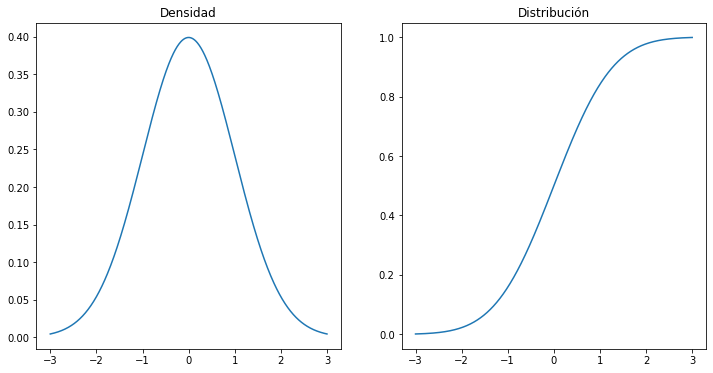

In [196]:
# Plot de densidad y distribución

# Densidad
n = -3
xs = []
ys = []
while n <= 3:
    xs.append(n)
    ys.append(va.pdf(n))
    n += 0.01

fig, (c1, c2) = plt.subplots(1,2, figsize=(12,6))
c1.plot(xs, ys)
c1.set_title("Densidad")

# Distribución
n = -3
xs = []
ys = []
while n <= 3:
    xs.append(n)
    ys.append(va.cdf(n))
    n += 0.01
    
c2.plot(xs, ys)
c2.set_title("Distribución")

### Chebyshev

In [197]:
def chebyshev(varianza,epsilon):
    return varianza / (epsilon ** 2)

In [198]:
# Uso chebyshev
var = 0.1
epsilon = 0.5
chebyshev(var, epsilon)

0.4

### Ley de Grandes Números

In [199]:
def LGN(n, varianza, epsilon):
    return varianza / ((epsilon ** 2) * n)

In [200]:
# Uso del LGN
n = 10
varianza = 0.1
epsilon = 0.5
LGN(n,varianza,epsilon)

0.04

### Teorema Central del Límite

In [201]:
# Proba de Sn > x
def TCL_suma(esp, var, n, x):
    va = scipy.stats.norm()
    k = (x - esp * n)/(math.sqrt(var*n))
    return 1 - va.cdf(k)

In [202]:
# Proba de Xn.raya > x
def TCL_promedio(esp, var, n, x):
    va = scipy.stats.norm()
    k = (x - esp)/(math.sqrt(var)/(math.sqrt(n)))
    return 1 - va.cdf(k)

### Estadística Descriptiva

In [203]:
# Datos de ejemplo
lista = [1,2,2,2,3,4,5,5,6,6,7,8,9,9]

In [204]:
datos = np.array(lista)
media = np.mean(datos)
mediana = np.median(datos)
quantiles = np.quantile(datos, [0.25,0.75])
IQR = quantiles[1] - quantiles[0]
sd = np.std(datos, ddof=1)
var = np.var(datos, ddof=1)
mediaPodada = scipy.stats.trim_mean(datos,proportiontocut = 0.1)
MAD = scipy.stats.median_abs_deviation(datos)

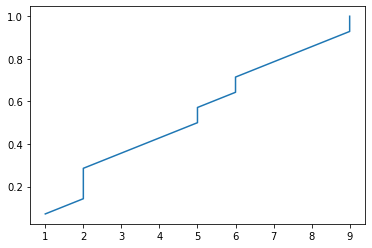

In [205]:
# Distribución empírica
d = ECDF(datos)
plt.plot(d.x, d.y)

### Cálculo de estimadores

In [206]:
# Calculo de estimador MaxVer distribución normal
def MVnormal(datos, mu=None, sigma=None):
    m = np.mean(datos)
    s = np.var(datos)
    var = sum((x-m)**2 for x in datos)/len(datos)
    if mu == None and sigma == None:
        return (m, var)
    if sigma == None:
        return (mu,s)
    else:
        return (m,sigma)

In [207]:
# Estimaciones de parametro para una Geométrica
def tMomentosGeom(datos):
    xRaya = np.mean(datos)
    return 1/xRaya

def tMaxVerGeom(datos):
    xRaya = np.mean(datos)
    return 1/xRaya

In [208]:
# Para el calculo del desvio estandar muestral
datos = [0]
sdMuestral = np.std(datos,ddof=1)

/Users/yagopajarino/Jupyter/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/yagopajarino/Jupyter/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Cálculo de intervalos de confianza

In [209]:
# Intervalos de confianza para distribuciones normales
def getIntervaloParaMuConVar(alfa, var, mediaMuestral, n):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-(alfa/2))
    sd = math.sqrt(var)
    return (mediaMuestral - (z*sd/math.sqrt(n)),(mediaMuestral + (z*sd/math.sqrt(n))))

def getIntervaloParaMuSinVar(alfa, sdMuestral, mediaMuestral, n):
    va = scipy.stats.t(df=n-1)
    z = va.ppf(1-(alfa/2))
    sd = sdMuestral
    return (mediaMuestral - (z*sd/math.sqrt(n)),(mediaMuestral + (z*sd/math.sqrt(n))))

def getIntervaloParaVarConMu(alfa,muestra,mu,n):
    va = scipy.stats.chi2(df=n)
    xMin = va.ppf(1-a/2)
    xMax = va.ppf(a/2)
    sumatoria = sum([(m-mu)**2 for m in muestra])
    return (sumatoria/xMin, sumatoria/xMax)

def getIntervaloParaVarSinMu(alfa, desvioMuestral, n):
    va = scipy.stats.chi2(df=n-1)
    xMin = va.ppf(1-a/2)
    xMax = va.ppf(a/2)
    ter = (n-1)*(desvioMuestral**2)
    return (ter/xMin, ter/xMax)

In [210]:
# N necesarios para lograr "l" logitud del intervalo
def nParaLograrLongitudMuConVar(alfa, var, l):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-(alfa/2))
    sd = math.sqrt(var)
    return (2*z*sd/l)**2

def nParaLograrLongitudMuSinVar(alfa, var, n, l):
    va = scipy.stats.t(df=n-1)
    t = va.ppf(1-(alfa/2))
    sd = math.sqrt(var)
    return (2*t*sd/l)**2

In [211]:
# Intervalo para exponencial exacto
def getIntervaloParaExponencial(muestra, alfa, n):
    va = scipy.stats.chi2(df=2*n)
    xMin = va.ppf(a/2)
    xMax = va.ppf(1-(a/2))
    sumatoria = sum(muestra)
    return (xMin/(2*sumatoria),xMax/(2*sumatoria))

In [212]:
# Intervalo asitótico para exponencial. Devuelve E(X) luego hay que rescatar el parametro lambda
def getIntervaloExpoenencialAsintotico(alfa, sd, xRaya, n):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-(alfa/2))
    return (xRaya - z*sd/math.sqrt(n),xRaya + z*sd/math.sqrt(n))

In [213]:
# Intervalo para Binomial
def getIntervaloBinomial(a, mediaMuestral, n):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-a/2)
    correc = math.sqrt((mediaMuestral*(1-mediaMuestral))/n)
    return (mediaMuestral - z*correc,mediaMuestral + z*correc)

In [214]:
# N para lograr longitud "l" del intervalo binomial
def nParaIntervaloBinomial(alfa, lMax):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-(alfa/2))
    return (z/lMax)**2

In [215]:
# Intervalo para la Poisson
def getIntervaloPoisson(a, mediaMuestral, n):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-a/2)
    correc = math.sqrt((mediaMuestral/n))
    return (mediaMuestral - z*correc,mediaMuestral + z*correc)

### Test de hipótesis

#### Error de tipo I

In [216]:
def rechazarH0NormalesParaMuConVar(tipo, alfa, mediaMuestral, mu_0, sigma, n):
    """
    Tipo 0: mu < mu_0
    Tipo 1: mu > mu_0
    Tipo 2: mu != mu_0
    """
    va = scipy.stats.norm()
    k = (mediaMuestral - mu_0)/(sigma/math.sqrt(n))
    print("mu = {}".format(k))
    if tipo == 0:
        z = -va.ppf(1-alfa)
        print("z = {}".format(z))
        if k < z:
            return True
        else: return False
    elif tipo == 1:
        z = va.ppf(1-alfa)
        print("z = {}".format(z))
        if k > z:
            return True
        else: return False
    else:
        z = va.ppf(1-alfa/2)
        print("z = {}".format(z))
        if (k < -z) or (k > z):
            return True
        else: return False

In [217]:
# Uso rechazarH0NormalesParaMuConVar
tipo = 1
alfa = 0.05
mediaMuestral = 30
mu = 37
sigma = math.sqrt(25)
n = 10
rechazarH0NormalesParaMuConVar(tipo, alfa, mediaMuestral, mu, sigma, n)

mu = -4.427188724235731
z = 1.6448536269514722


False

In [218]:
def rechazarH0NormalesParaMuSinVar(tipo, alfa, mediaMuestral, mu_0, desvioMuestral, n):
    """
    Tipo 0: mu < mu_0
    Tipo 1: mu > mu_0
    Tipo 2: mu != mu_0
    """
    va = scipy.stats.t(df=n-1)
    k = (mediaMuestral - mu_0)/(desvioMuestral/math.sqrt(n))
    print("mu = {}".format(k))
    if tipo == 0:
        z = -va.ppf(1-alfa)
        print("z = {}".format(z))
        if k < z:
            return True
        else: return False
    elif tipo == 1:
        z = va.ppf(1-alfa)
        print("z = {}".format(z))
        if k > z:
            return True
        else: return False
    else:
        z = va.ppf(1-alfa/2)
        print("z = {}".format(z))
        if (k < -z) or (k > z):
            return True
        else: return False

In [219]:
# Uso rechazarH0NormalesParaMuSinVar
tipo = 1
alfa = 0.05
mediaMuestral = 304
mu = 300
desvioMuestral = 10
n = 10
rechazarH0NormalesParaMuSinVar(tipo, alfa, mediaMuestral, mu, desvioMuestral, n)

mu = 1.2649110640673518
z = 1.8331129326536335


False

In [220]:
def rechazarH0NormalesParaVarSinMu(tipo, alfa, sigma_0, desvioMuestral, n):
    """
    Tipo 0: mu < mu_0
    Tipo 1: mu > mu_0
    Tipo 2: mu != mu_0
    """
    va = scipy.stats.chi2(df=n-1)
    k = ((n-1)*(desvioMuestral**2))/(sigma_0**2)
    print("var = {}".format(k))
    if tipo == 0:
        z = va.ppf(alfa)
        print("z = {}".format(z))
        if k < z:
            return True
        else: return False
    elif tipo == 1:
        z = va.ppf(1-alfa)
        print("z = {}".format(z))
        if k > z:
            return True
        else: return False
    else:
        z0 = va.ppf(alfa/2)
        z1 = va.ppf(1-alfa/2)
        print("z = {}".format((z0,z1)))
        if (k < z0) or (k > z1):
            return True
        else: return False

In [221]:
# Uso rechazarH0NormalesParaVarSinMu
datos = [27, 41, 22, 27, 23,35, 30, 24, 27, 28, 22]
tipo = 0
alfa = 0.05
sigma_0 = 6
desvioMuestral = np.std(datos,ddof=1)
n = 11
rechazarH0NormalesParaVarSinMu(tipo, alfa, sigma_0, desvioMuestral, n)

var = 9.378787878787879
z = 3.9402991361190605


False

In [222]:
def rechazarH0Bernoulli(tipo, alfa, mediaMuestral, p_0, n):
    """
    Tipo 0: p < p_0
    Tipo 1: p > p_0
    Tipo 2: p != p_0
    """
    va = scipy.stats.norm()
    k = (mediaMuestral - p_0)/(math.sqrt(p_0*(1-p_0))/math.sqrt(n))
    print("p = {}".format(k))
    if tipo == 0:
        z = -va.ppf(1-alfa)
        print("z = {}".format(z))
        if k < z:
            return True
        else: return False
    elif tipo == 1:
        z = va.ppf(1-alfa)
        print("z = {}".format(z))
        if k > z:
            return True
        else: return False
    else:
        z = va.ppf(1-alfa/2)
        print("z = {}".format(z))
        if (k < -z) or (k > z):
            return True
        else: return False

In [223]:
# Uso rechazarH0Bernoulli
tipo = 1
alfa = 0.05
mediaMuestral = 26/200
p_0 = 0.1
n = 200
rechazarH0Bernoulli(tipo, alfa, mediaMuestral, p_0, n)

p = 1.414213562373095
z = 1.6448536269514722


False

#### Error de tipo II

In [224]:
def probaErrorTipoII(tipo, alfa, mu_0, mu, sigma, n):
    """
    Tipo 0: mu < mu_0
    Tipo 1: mu > mu_0
    Tipo 2: mu != mu_0
    """
    va = scipy.stats.norm()
    const = (mu_0 - mu)/(sigma/math.sqrt(n))
    if tipo == 0:
        z = -va.ppf(1-alfa)
        return 1 - va.cdf(z+const)
    elif tipo == 1:
        z = va.ppf(1-alfa)
        return va.cdf(z+const)
    else:
        z = va.ppf(1-alfa/2)
        return va.cdf(z+const) - va.cdf(-z+const)

In [225]:
# Uso error proba tipo II
tipo = 1
alfa = 0.05
mu_0 = 37
mu = 40
sigma = 5
n = 10
probaErrorTipoII(tipo, alfa, mu_0, mu, sigma, n)

0.400322295453562

In [226]:
def nParaErrotTipoIIMenorEpsilon(tipo, alfa, epsilon, sigma, mu_0, mu):
    """
    Tipo 0: mu < mu_0
    Tipo 1: mu > mu_0
    Tipo 2: mu != mu_0
    """
    va = scipy.stats.norm()
    if tipo == 0:
        z = -va.ppf(1-alfa)
        e = va.ppf(1-epsilon)
        return (((e+z)*sigma)/(mu_0-mu))**2
    elif tipo == 1:
        z = va.ppf(1-alfa)
        e = va.ppf(epsilon)
        return (((e-z)*sigma)/(mu-mu_0))**2
    else:
        return "No hay n"

In [227]:
# Uso nParaErrotTipoIIMenorEpsilon
tipo = 1
alfa = 0.05
epsilon = 0.05
sigma = 5
mu_0 = 37
mu = 40
nParaErrotTipoIIMenorEpsilon(tipo, alfa, epsilon, sigma, mu_0, mu)

30.06159393439349

#### Función de potencia

In [228]:
# Función de potencia, cambiar el los parametros distintos a mu y el tipo de test
def funcionPotencia(mu):
    if mu <= mu_0:
        va = scipy.stats.norm()
        k = (media - mu)/(sigma/math.sqrt(n))
        return 1-va.cdf(k)
    else:
        return 1-probaErrorTipoII(tipo, alfa, mu_0, mu, sigma, n)

In [229]:
# Uso función de potencia
mu = 15
funcionPotencia(mu)

0.9999999999053198

#### Cálculo del p-value

In [230]:
# NO es función general, hay que cambiar el tipo de distribución y la proba acumulada según el tipo de test
va = scipy.stats.t(df=n-1)
mu = 1.2649110640673518
1-va.cdf(mu)

0.11883628158949289

## Resolución parcial integrador

Para regularizar la materia son necesarios 50 de los 100 puntos:
* Entrega 1: 5.5
* Entrega 2: 6
* Entrega 3: 8
* Entrega 4: 10

Puntaje total entregas: 29.5

Puntaje necesario: 50 - 29.5 = 20.5

In [231]:
def resFinalParser(n):
    print(str(round(n,4)).replace(".",","))